# Valencia Blancas Jozef Andrew Github: Droshimiro
# Marco Antonio Robledo Ramírez Github: Marc0Antoni013

## !Iniciando el automata celular¡

In [545]:
from numpy import zeros
from numpy.random import random, seed
import matplotlib.pyplot as plt

Hasta este punto ya hemos importado lo necesario para el programa con esto me refiero a *numpy (zeros) y numpy.random*. Con este definimos la probabilidad y le dimos a la celular un plano 2D y proporcionando su color negro y las casillas que no sean usadas se haran de un color naranja.

In [546]:
def simulation_step(CA, next_CA):

    for x in range(width):
        for y in range(height):

            cell_state = CA[y, x] 

            activating_cells = 0
            inhibiting_cells = 0

            
            for xpos in range(- inhibitor_radius, inhibitor_radius + 1):
                for ypos in range(- inhibitor_radius, inhibitor_radius + 1):
                    inhibiting_cells += CA[(y+ypos)%height, (x+xpos)%width]

            
            for xpos in range(- activator_radius, activator_radius + 1):
                for ypos in range(- activator_radius, activator_radius + 1):
                    activating_cells += CA[(y+ypos)%height, (x+xpos)%width]

            
            if (activating_cells * activator_weight) + (inhibiting_cells * inhibitor_weight) > 0:
                cell_state = 1
            else:
                cell_state = 0

            
            next_CA[y, x] = cell_state

    return next_CA

Aqui ya hemos definido la funcion que nos ayudara inicializar al CA (Celular Automata) repitiendo la funcion en un looping que se repite una y otra vez

Inhibition loop:El primer ciclo se encarga de examinar las celulas dentro de un radio de inhibitor_radius de la celda actual, contando solo las que aparecen en negro

In [547]:
seed()

In [548]:
probability_of_black = 0.5
width = 100
height = 100

Despues se crean 2 celulas automas:
1.**CA** es el estado actaul del programa, al momemnto de ejecutar esta funcion de esta matriz se leeran las celdas a utilizar.
2.**next_CA** este sera su estado actual despues de hacer la simulacion

A continuacion definiremos el **radio del activador** (en una casilla considerando las 9 caasillas vecinas mas cercanas para definir distancia) y el peso quimico del mismo, despues Se define el radio maximo que tomara en cuenta todas las celdas dentro de una cadricula de 5x5 y su propio peso 

In [549]:
CA = zeros([height, width])       # main CA
next_CA = zeros([height, width])  # CA next timestep

activator_radius = 1
activator_weight = 1
inhibitor_radius = 5
inhibitor_weight = -0.1

time = 0

In [550]:
for x in range(width):
    for y in range(height):
        if random() < probability_of_black:
            cell_state = 1
        else:
            cell_state = 0
        CA[y, x] = cell_state

Por ultimo toca representar los lapzos de tiempo y ver como re reproduce el automata celular gracias a las funciones *matplotlib*

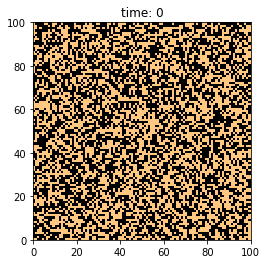

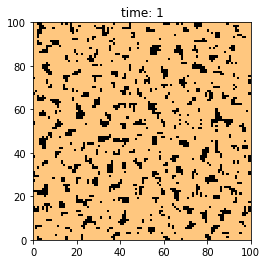

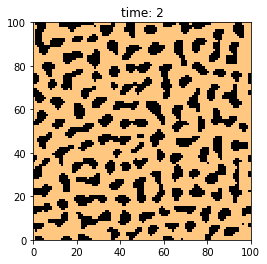

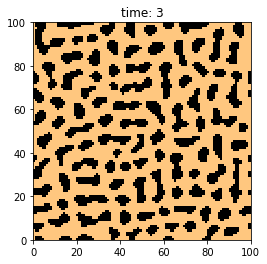

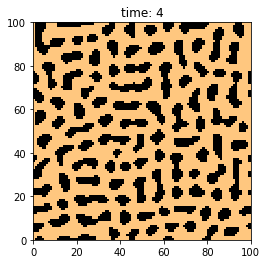

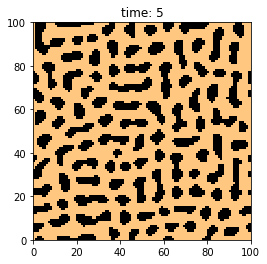

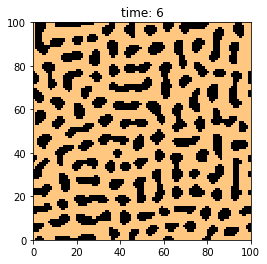

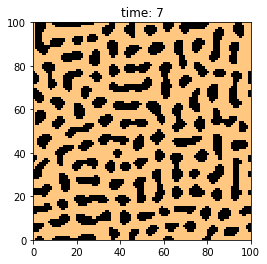

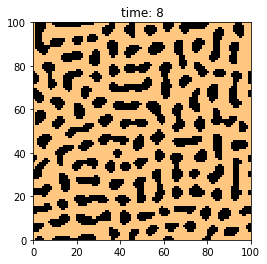

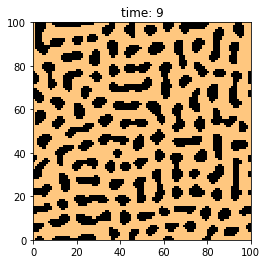

In [551]:
fig1 = plt.figure()


for time in range(10):
    plt.pcolor(CA, vmin = 0, vmax = 1, cmap = "copper_r")  # plot current CA
    plt.axis('image')
    plt.title('time: ' + str(time))
    plt.draw()
    plt.pause(0.5)

    CA = simulation_step(CA, next_CA)